# Energy Spectrum of hydrgen molecule by varying interatomic distances

# Modules Import

In [1]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.providers.aer import StatevectorSimulator
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_nature.algorithms import VQEUCCFactory
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal
from qiskit_nature.algorithms import GroundStateEigensolver

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
quantum_instance = QuantumInstance(backend=Aer.get_backend("aer_simulator_statevector"))
vqe_solver = VQEUCCFactory(quantum_instance)

In [3]:
from qiskit.algorithms import NumPyMinimumEigensolver
numpy_solver = NumPyMinimumEigensolver()

In [4]:
import numpy as np
distance = np.arange(0.1,3,0.1)
distance

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])

In [5]:
ce = []
qe = []

In [6]:
for j,i in enumerate(distance):
    molecule = Molecule(
    geometry=[
        ["H", [0.0, 0.0, 0.0]],
        ["H", [0.0, 0.0, i]]], 
    charge=0, 
    multiplicity=1
    )
    driver = ElectronicStructureMoleculeDriver(
        molecule, 
        basis="sto3g", 
        driver_type=ElectronicStructureDriverType.PYSCF)
    
    es_problem = ElectronicStructureProblem(driver)
    qubit_converter = QubitConverter(JordanWignerMapper())
    tl_circuit = TwoLocal(
        rotation_blocks=["h", "rx"],
        entanglement_blocks="cz",
        entanglement="full",
        reps=2,
        parameter_prefix="y",
    )
    another_solver = VQE(
        ansatz=tl_circuit,
        quantum_instance=QuantumInstance(Aer.get_backend("aer_simulator_statevector")))
    calc = GroundStateEigensolver(qubit_converter, numpy_solver)
    c_res = calc.solve(es_problem)
    ce.append(c_res.total_energies)
    calc = GroundStateEigensolver(qubit_converter, vqe_solver)
    q_res = calc.solve(es_problem)
    qe.append(q_res.total_energies)
    print("distance -> ",distance[j])

distance ->  0.1
distance ->  0.2
distance ->  0.30000000000000004
distance ->  0.4
distance ->  0.5
distance ->  0.6
distance ->  0.7000000000000001
distance ->  0.8
distance ->  0.9
distance ->  1.0
distance ->  1.1
distance ->  1.2000000000000002
distance ->  1.3000000000000003
distance ->  1.4000000000000001
distance ->  1.5000000000000002
distance ->  1.6
distance ->  1.7000000000000002
distance ->  1.8000000000000003
distance ->  1.9000000000000001
distance ->  2.0
distance ->  2.1
distance ->  2.2
distance ->  2.3000000000000003
distance ->  2.4000000000000004
distance ->  2.5000000000000004
distance ->  2.6
distance ->  2.7
distance ->  2.8000000000000003
distance ->  2.9000000000000004


In [7]:
qe

[array([2.70996077]),
 array([0.15748213]),
 array([-0.60180371]),
 array([-0.9141497]),
 array([-1.05515979]),
 array([-1.11628601]),
 array([-1.13618945]),
 array([-1.13414767]),
 array([-1.12056013]),
 array([-1.10115032]),
 array([-1.07919294]),
 array([-1.05674074]),
 array([-1.03518626]),
 array([-1.01546825]),
 array([-0.99814935]),
 array([-0.98347273]),
 array([-0.97142669]),
 array([-0.96181666]),
 array([-0.95433885]),
 array([-0.94864111]),
 array([-0.94437468]),
 array([-0.94122403]),
 array([-0.93892237]),
 array([-0.93725491]),
 array([-0.93605486]),
 array([-0.93519594]),
 array([-0.9345843]),
 array([-0.93415097]),
 array([-0.93384561])]

In [8]:
import matplotlib.pyplot as plt

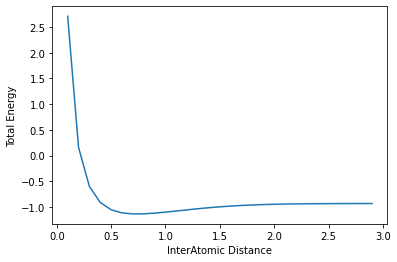

In [9]:
plt.plot(distance,qe)
plt.ylabel("Total Energy")
plt.xlabel("InterAtomic Distance")
plt.show()

In [10]:
min(qe)

array([-1.13618945])